In [1]:
import sympy as sp

# Parámetro y funciones trigonométricas
t = sp.symbols('t', real=True)

# Parametrización del círculo unidad: r(t) = (cos t, sin t)
x = sp.cos(t)
y = sp.sin(t)
r = sp.Matrix([x, y])

# Derivada r'(t)
rp = sp.diff(r, t)

# Campo F(x,y) = (-y/(x^2+y^2), x/(x^2+y^2))
# En el círculo unidad x^2 + y^2 = 1 → el denominador vale 1
F = sp.Matrix([-y/(x**2 + y**2), x/(x**2 + y**2)])

# F evaluado sobre la curva y producto punto F·r'
F_on_curve = sp.simplify(F.subs({}))
integrand = sp.simplify(F_on_curve.dot(rp))

F_on_curve, rp, integrand


(Matrix([
 [-sin(t)],
 [ cos(t)]]),
 Matrix([
 [-sin(t)],
 [ cos(t)]]),
 1)

In [2]:
def linea(a, b):
    """Integral de línea ∫ F·dr sobre r(t), t de a a b."""
    return sp.integrate(integrand, (t, a, b))

# Pruebas rápidas
I_0_pi   = linea(0, sp.pi)      # CCW de 0 a π
I_0_mpi  = linea(0, -sp.pi)     # CW de 0 a -π

I_0_pi, I_0_mpi


(pi, -pi)

In [3]:
W_contra_a = -I_0_pi    # (a) 0 → π, antihorario
W_contra_b = -I_0_mpi   # (b) 0 → -π, horario

sp.simplify(W_contra_a), sp.simplify(W_contra_b)



(-pi, pi)

In [1]:
import sys
!{sys.executable} -m pip install matplotlib numpy



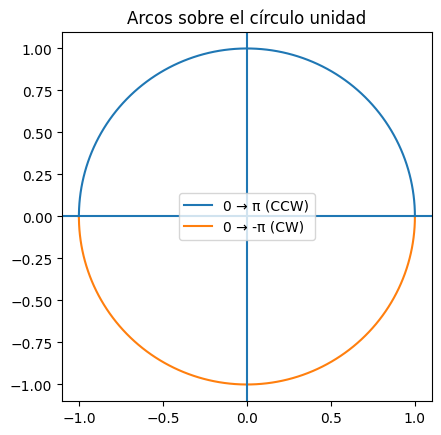

In [7]:
import matplotlib.pyplot as plt
import numpy as np

theta = np.linspace(0, np.pi, 200)      # arco CCW (a)
xc, yc = np.cos(theta), np.sin(theta)

theta2 = np.linspace(0, -np.pi, 200)    # arco CW (b)
xc2, yc2 = np.cos(theta2), np.sin(theta2)

plt.figure()
plt.plot(xc, yc, label='0 → π (CCW)')
plt.plot(xc2, yc2, label='0 → -π (CW)')
plt.gca().set_aspect('equal', 'box')
plt.axhline(0); plt.axvline(0)
plt.legend(); plt.title('Arcos sobre el círculo unidad')
plt.show()
